In [1]:
# Dependencies and Setup

%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress



In [2]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Combine the data into a single dataset
mouse_drug_data= "mouse_drug_data.csv"
clinical_trial_data = "clinicaltrial_data.csv"

mouse_drug_df = pd.read_csv(mouse_drug_data)

clinical_trial_df = pd.read_csv(clinical_trial_data)

combined_trial_df = pd.merge(mouse_drug_df, clinical_trial_df, how='outer', on='Mouse ID')

    

In [4]:
# Display the data table for preview
combined_trial_df

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
...,...,...,...,...,...
1901,j235,Placebo,0,45.000000,0
1902,j235,Placebo,5,46.588820,0
1903,j235,Placebo,10,48.018788,1
1904,j235,Placebo,15,51.161138,1


# Tumor Response to Treatment


In [5]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
combined_trial_df["Timepoint"] = combined_trial_df["Timepoint"].astype("object")


In [6]:
# Convert to DataFrame
combined_trial_df 

# Preview DataFrame

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
...,...,...,...,...,...
1901,j235,Placebo,0,45.000000,0
1902,j235,Placebo,5,46.588820,0
1903,j235,Placebo,10,48.018788,1
1904,j235,Placebo,15,51.161138,1


In [7]:
combined_trial_index=combined_trial_df.set_index("Mouse ID")

In [8]:
#A left join, or left merge, keeps every row from the left dataframe. Result from left-join or left-merge of two dataframes in Pandas. Rows in the left dataframe that have no corresponding join value in the right dataframe are left with NaN values."
#left_join=pd.merge(clinical_trial_df,mouse_drug_data,how="left",on="Mouse ID","Mouse ID")
#left_join=pd.merge(clinical_trial_df,mouse_drug_data,how="left",on=["Mouse ID","Mouse ID"])
left_join=pd.merge(clinical_trial_df,mouse_drug_df,how="left",on=["Mouse ID","Mouse ID"])

In [9]:
#Group by drug and timepoint

by_drug_timepoint=left_join.groupby(["Drug","Timepoint"])
#by_drug_timepoint

#Standard Error

#1. Mean

mean_tumor=by_drug_timepoint["Tumor Volume (mm3)"].mean()

mean_tumor_by_dt=pd.DataFrame({"Mean Tumor Volume (mm3)":mean_tumor})

#mean_tumor_by_dt



In [10]:
#2.Sem function

#tumor_volume_na=tumor_renamed["Tumor(mm3)"].sem(axis=1)
#tumor_volume_na=tumor_renamed.groupby("Drug").sem()
#tumor_volume_na

standard_error_tumor=by_drug_timepoint["Tumor Volume (mm3)"].sem()
standard_error_tumor_by_dt=pd.DataFrame({"Mean Tumor Volume (mm3)":standard_error_tumor})

standard_error_tumor_by_dt



Mean Tumor Volume (mm3)
Drug      Timepoint                         
Capomulin 0                         0.000000
          5                         0.448593
          10                        0.702684
          15                        0.838617
          20                        0.909731
...                                      ...
Zoniferol 25                        0.602513
          30                        0.800043
          35                        0.881426
          40                        0.998515
          45                        1.003576

[100 rows x 1 columns]

In [11]:
#Trials
#Drug=grouped_trial_df["Drug"]

#Timepoint=grouped_trial_df["Timepoint"]

#Tumor=grouped_trial_df["Tumor Volume (mm3)"].sem(axis=0,skipna=True)



#df.sem(axis = 1, skipna = False) 

#Tumor = grouped_trial_df["Tumor Volume (mm3)"].map"Tumor Volume (mm3)"].sem())

#print(data['salary'].std())

#standard_error_tumor=pd.DataFrame({"Drug":Drug,
                    #"Timepoint":Timepoint,
                    #"Tumor Volume (mm3)":Tumor})

#standard_error_tumor

#clear=standard_error_tumor.dropna(subset=["Tumor Volume (mm3)"])

#clear.head()

In [12]:
standard_error_tumor_by_dt=standard_error_tumor_by_dt.reset_index()
mean_tumor_by_dt=mean_tumor_by_dt.reset_index()


In [13]:
#Pivots

pivot_mean_tumor=pd.pivot_table(mean_tumor_by_dt,values="Mean Tumor Volume (mm3)",index="Timepoint",columns="Drug")
pivot_mean_tumor_stand_error=pd.pivot_table(standard_error_tumor_by_dt,values="Mean Tumor Volume (mm3)",index="Timepoint",columns="Drug")


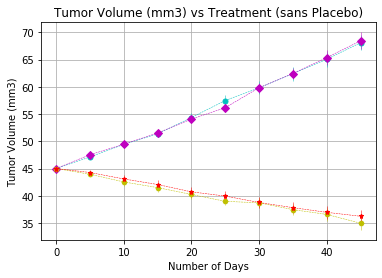

<Figure size 432x288 with 0 Axes>

In [14]:
#Creating a scatter plot that shows how the tumor volume changes over time for each treatment.
#drug_1=["Capomulin"]
#drug_2=["Ramicane"]
#drug_3=["Stelasyn"]
#drug_4=["Placebo"]

plt.errorbar(pivot_mean_tumor.index,pivot_mean_tumor["Placebo"],
            yerr=pivot_mean_tumor_stand_error["Placebo"],color="c",
            marker="o",markersize=5,linestyle="dashed",linewidth=0.50)
plt.errorbar(pivot_mean_tumor.index,pivot_mean_tumor["Stelasyn"],
            yerr=pivot_mean_tumor_stand_error["Stelasyn"],color="m",
            marker="D",markersize=5,linestyle="dashed",linewidth=0.50)
plt.errorbar(pivot_mean_tumor.index,pivot_mean_tumor["Ramicane"],
            yerr=pivot_mean_tumor_stand_error["Ramicane"],color="y",
            marker="H",markersize=5,linestyle="dashed",linewidth=0.50)
plt.errorbar(pivot_mean_tumor.index,pivot_mean_tumor["Capomulin"],
            yerr=pivot_mean_tumor_stand_error["Capomulin"],color="r",
            marker="*",markersize=5,linestyle="dashed",linewidth=0.50)

#Formats

plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Number of Days")
plt.grid(True)
plt.title("Tumor Volume (mm3) vs Treatment (sans Placebo)")

plt.show()

plt.savefig("image_1.png")


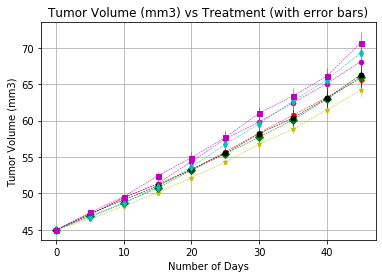

<Figure size 432x288 with 0 Axes>

In [15]:
# Tumor volume per treatment with error bars

plt.errorbar(pivot_mean_tumor.index,pivot_mean_tumor["Placebo"],
            yerr=pivot_mean_tumor_stand_error["Placebo"],color="m",
            marker="H",markersize=5,linestyle="dashed",linewidth=0.50)
plt.errorbar(pivot_mean_tumor.index,pivot_mean_tumor["Ceftamin"],
            yerr=pivot_mean_tumor_stand_error["Ceftamin"],color="y",
            marker="*",markersize=5,linestyle="dashed",linewidth=0.50)
plt.errorbar(pivot_mean_tumor.index,pivot_mean_tumor["Infubinol"],
            yerr=pivot_mean_tumor_stand_error["Infubinol"],color="r",
            marker="X",markersize=5,linestyle="dashed",linewidth=0.50)
plt.errorbar(pivot_mean_tumor.index,pivot_mean_tumor["Zoniferol"],
            yerr=pivot_mean_tumor_stand_error["Zoniferol"],color="g",
            marker="D",markersize=5,linestyle="dashed",linewidth=0.50)
plt.errorbar(pivot_mean_tumor.index,pivot_mean_tumor["Propriva"],
            yerr=pivot_mean_tumor_stand_error["Propriva"],color="k",
            marker="o",markersize=5,linestyle="dashed",linewidth=0.50)
plt.errorbar(pivot_mean_tumor.index,pivot_mean_tumor["Naftisol"],
            yerr=pivot_mean_tumor_stand_error["Naftisol"],color="c",
            marker="d",markersize=5,linestyle="dashed",linewidth=0.50)
plt.errorbar(pivot_mean_tumor.index,pivot_mean_tumor["Ketapril"],
            yerr=pivot_mean_tumor_stand_error["Ketapril"],color="m",
            marker="s",markersize=5,linestyle="dashed",linewidth=0.50)

#Formats

plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Number of Days")
plt.grid(True)
plt.title("Tumor Volume (mm3) vs Treatment (with error bars)")

plt.show()

plt.savefig("image_2.png")


In [16]:
#plot showing how the number of metastatic (cancer spreading) sites 
#change over time for each treatment

number_metastatic=by_drug_timepoint["Metastatic Sites"].mean()
number_metastatic_by_dt=pd.DataFrame({"Mean Metastatic Sites":number_metastatic})

number_metastatic_se=by_drug_timepoint["Metastatic Sites"].sem()
number_metastatic_se_df=pd.DataFrame({"Mean Metastatic Sites":number_metastatic_se})

#number_metastatic_se_df

number_metastatic_by_dt=number_metastatic_by_dt.reset_index()
number_metastatic_se_df=number_metastatic_by_dt.reset_index()

pivot_mms=pd.pivot_table(number_metastatic_by_dt,values="Mean Metastatic Sites",index="Timepoint",
                        columns="Drug")
pivot_se_metastatic=pd.pivot_table(number_metastatic_by_dt,values="Mean Metastatic Sites",index="Timepoint",
                        columns="Drug")


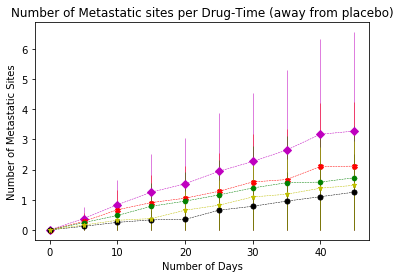

<Figure size 432x288 with 0 Axes>

In [17]:
#Plot

plt.errorbar(pivot_mms.index,pivot_mms["Placebo"],
         yerr=pivot_se_metastatic["Placebo"], color="m",
         marker="D",markersize=5,linestyle="dashed",
         linewidth=0.50)
plt.errorbar(pivot_mms.index,pivot_mms["Infubinol"],
         yerr=pivot_se_metastatic["Infubinol"], color="r",
         marker="X",markersize=5,linestyle="dashed",
         linewidth=0.50)
plt.errorbar(pivot_mms.index,pivot_mms["Stelasyn"],
         yerr=pivot_se_metastatic["Stelasyn"], color="g",
         marker="H",markersize=5,linestyle="dashed",
         linewidth=0.50)
plt.errorbar(pivot_mms.index,pivot_mms["Ramicane"],
         yerr=pivot_se_metastatic["Ramicane"], color="k",
         marker="o",markersize=5,linestyle="dashed",
         linewidth=0.50)
plt.errorbar(pivot_mms.index,pivot_mms["Capomulin"],
         yerr=pivot_se_metastatic["Capomulin"], color="y",
         marker="*",markersize=5,linestyle="dashed",
         linewidth=0.50)

#Formats

plt.ylabel("Number of Metastatic Sites")
plt.xlabel("Number of Days")
#plt.grid(True)
plt.title("Number of Metastatic sites per Drug-Time (away from placebo)")

plt.show()

plt.savefig("image_3.png")





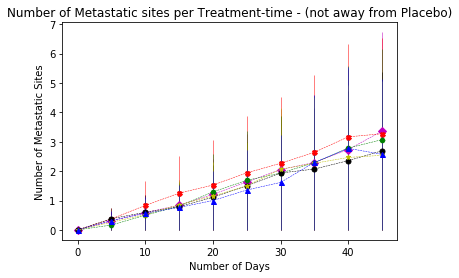

In [18]:
# Adding Error Bars

plt.errorbar(pivot_mms.index,pivot_mms["Ketapril"],
         yerr=pivot_se_metastatic["Ketapril"], color="m",
         marker="D",markersize=5,linestyle="dashed",
         linewidth=0.50)
plt.errorbar(pivot_mms.index,pivot_mms["Placebo"],
         yerr=pivot_se_metastatic["Placebo"], color="r",
         marker="X",markersize=5,linestyle="dashed",
         linewidth=0.50)
plt.errorbar(pivot_mms.index,pivot_mms["Zoniferol"],
         yerr=pivot_se_metastatic["Zoniferol"], color="g",
         marker="H",markersize=5,linestyle="dashed",
         linewidth=0.50)
plt.errorbar(pivot_mms.index,pivot_mms["Ceftamin"],
         yerr=pivot_se_metastatic["Ceftamin"], color="k",
         marker="o",markersize=5,linestyle="dashed",
         linewidth=0.50)
plt.errorbar(pivot_mms.index,pivot_mms["Naftisol"],
         yerr=pivot_se_metastatic["Naftisol"], color="y",
         marker="*",markersize=5,linestyle="dashed",
         linewidth=0.50)
plt.errorbar(pivot_mms.index,pivot_mms["Propriva"],
         yerr=pivot_se_metastatic["Propriva"], color="b",
         marker="^",markersize=5,linestyle="dashed",
         linewidth=0.50)

plt.title("Number of Metastatic sites per Treatment-time - (not away from Placebo)")
plt.ylabel("Number of Metastatic Sites")
plt.xlabel("Number of Days")


# Save the Figure
plt.savefig("image_4.png")

# Show the Figure
plt.show()



In [19]:
number_mice=by_drug_timepoint["Mouse ID"].count()
number_mice_df=pd.DataFrame({"Mouse Count":number_mice})
#number_mice_df

number_mice_df=number_mice_df.reset_index()

number_mice_df=number_mice_df.pivot(index="Timepoint",columns="Drug")["Mouse Count"]
#number_mice_df

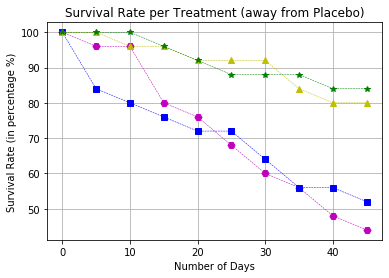

<Figure size 432x288 with 0 Axes>

In [20]:
plt.plot(100 * number_mice_df["Placebo"] / 25, "mH", 
         linestyle="dashed", markersize=7, linewidth=0.50)
plt.plot(100 * number_mice_df["Ceftamin"] / 25, "bs", 
         linestyle="dashed", markersize=6, linewidth=0.50)
plt.plot(100 * number_mice_df["Ramicane"] / 25, "y^", 
         linestyle="dashed", markersize=6, linewidth=0.50)
plt.plot(100 * number_mice_df["Capomulin"] / 25 , "g*", 
         linestyle="dashed", markersize=6, linewidth=0.50)

plt.title("Survival Rate per Treatment (away from Placebo)")
plt.ylabel("Survival Rate (in percentage %)")
plt.xlabel("Number of Days")
plt.grid(True)

# Show the Figure
plt.show()

plt.savefig("image_5.png")


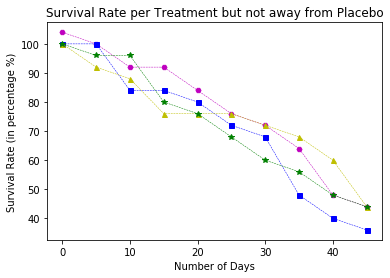

<Figure size 432x288 with 0 Axes>

In [21]:
plt.plot(100 * number_mice_df["Stelasyn"] / 25, "mH", 
         linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * number_mice_df["Infubinol"] / 25, "bs", 
         linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * number_mice_df["Ketapril"] / 25, "y^", 
         linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * number_mice_df["Placebo"] / 25 , "g*", 
         linestyle="dashed", markersize=6, linewidth=0.50)

plt.title("Survival Rate per Treatment but not away from Placebo")
plt.ylabel("Survival Rate (in percentage %)")
plt.xlabel("Number of Days")
#plt.grid(True)

# Show the Figure
plt.show()

plt.savefig("image_6.png")


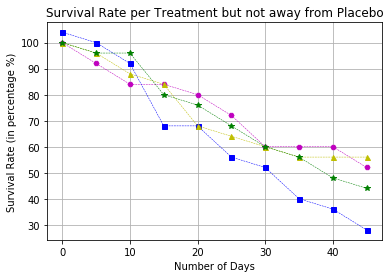

<Figure size 432x288 with 0 Axes>

In [22]:
plt.plot(100 * number_mice_df["Naftisol"] / 25, "mH", 
         linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * number_mice_df["Propriva"] / 25, "bs", 
         linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * number_mice_df["Zoniferol"] / 25, "y^", 
         linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * number_mice_df["Placebo"] / 25 , "g*", 
         linestyle="dashed", markersize=6, linewidth=0.50)


plt.title("Survival Rate per Treatment but not away from Placebo")
plt.ylabel("Survival Rate (in percentage %)")
plt.xlabel("Number of Days")
plt.grid(True)

# Show the Figure
plt.show()

plt.savefig("image_7.png")


In [26]:
#Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days
#percentage_change= 100*(pivot_mean_tumor.iloc[0]-pivot_mean_tumor[0] /pivot_mean_tumor.iloc[-1]
#percentage_change= 100*(pivot_mean_tumor.[-1]-pivot_mean_tumor[0] /pivot_mean_tumor[0]
#percentage_change_sem =  100 * (pivot_mean_tumor_stand_error.iloc[0] - pivot_mean_tumor_stand_error.iloc[-1]) / pivot_mean_tumor_stand_error.iloc[0]

percentage_change= 100*(pivot_mean_tumor.iloc[-1]-pivot_mean_tumor[0]) /pivot_mean_tumor.iloc[0]
                        
percentage_change_sem =  100 * (pivot_mean_tumor_stand_error.iloc[-1] - pivot_mean_tumor_stand_error.iloc[0]) / pivot_mean_tumor_stand_error.iloc[0]

percentage_change










KeyError: 0

In [ ]:
percentage_changes = (percentage_change["Ramicane"], percentage_change["Capomulin"], percentage_change["Ceftamin"], 
               percentage_change["Zoniferol"], percentage_change["Infubinol"], percentage_change["Propriva"],
               percentage_change["Stelasyn"], percentage_change["Naftisol"], percentage_change["Ketapril"], 
               percentage_change["Placebo"])

ax.set_ylabel("Percentage Tumor Volume Change")
ax.set_title("Tumor Change Over Time")
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(("Ram", "Cap", "Cef", "Zon", "Inf", "Pro", "Ste", "Naf", "Ket", "Plac"))
ax.set_autoscaley_on(False)
ax.set_ylim([-30,70])
ax.grid(True)
